In [3]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.13.1


In [4]:
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 3s 85us/step


'/Users/bryanwu/.keras/datasets/auto-mpg.data'

In [5]:
raw_dataset = pd.read_csv(dataset_path)

In [16]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [49]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
dtype: int64

In [18]:
dataset = dataset.dropna()

In [19]:
origin = dataset.pop('Origin')

In [50]:
print(type(origin))

<class 'pandas.core.series.Series'>


In [14]:
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [21]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

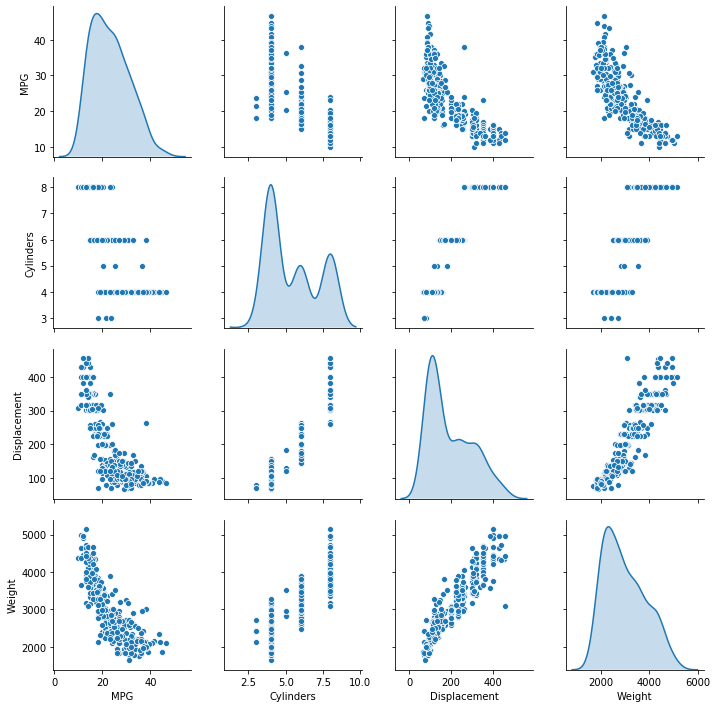

In [22]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [23]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [25]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0


In [55]:
type(train_stats['mean'])

pandas.core.series.Series

In [54]:
train_dataset - train_stats['mean']

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
146,-1.477707,-105.318471,-29.869427,-865.251592,-1.059236,-1.898089
282,-1.477707,-55.318471,-16.869427,-100.251592,1.740764,3.101911
69,2.522293,154.681529,55.130573,1465.748408,-2.059236,-3.898089
378,-1.477707,-90.318471,-41.869427,-865.251592,-0.859236,6.101911
331,-1.477707,-98.318471,-37.869427,-845.251592,2.440764,4.101911
257,0.522293,36.681529,-14.869427,219.748408,1.640764,2.101911
310,-1.477707,-106.318471,-44.869427,-1022.251592,3.240764,4.101911
328,-1.477707,-49.318471,-37.869427,259.748408,6.240764,4.101911
125,0.522293,2.681529,-9.869427,111.748408,0.940764,-1.898089
108,-1.477707,-98.318471,-16.869427,-711.251592,3.440764,-2.898089


In [26]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [34]:
print(type(normed_train_data))

<class 'pandas.core.frame.DataFrame'>


In [30]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
    return model


In [31]:
model = build_model()

Instructions for updating:
Use tf.cast instead.


In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [33]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[0.35890463],
       [0.25499606],
       [0.31846696],
       [0.41546375],
       [0.36847556],
       [0.16160172],
       [0.39272153],
       [0.4406174 ],
       [0.08230485],
       [0.2516768 ]], dtype=float32)

In [35]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

Instructions for updating:
Use tf.cast instead.

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................

In [36]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,3.804984,1.290735,3.804983,10.669586,2.464190,10.669587,995
996,4.012437,1.316431,4.012436,10.321987,2.518126,10.321987,996
997,3.649239,1.262832,3.649239,10.348225,2.444489,10.348226,997
998,3.580238,1.259146,3.580238,10.530255,2.559421,10.530256,998
999,3.838292,1.318580,3.838292,10.175544,2.473962,10.175544,999


In [37]:
print(type(history.history))

<class 'dict'>


In [38]:
print(history.history)

{'loss': [556.4221784736055, 503.7578325613561, 446.56681927076846, 384.0913927298618, 318.0144185829923, 251.4867254614355, 188.8044932695974, 135.23370662248468, 92.32599132279476, 62.25946544935979, 45.75342252814912, 38.157926217493305, 33.98632827697997, 30.712704343149863, 27.60465871195394, 24.71332622999214, 22.332595361656402, 19.95052496845504, 18.204585402135354, 16.77262960107203, 15.384511480293426, 14.14327246829333, 13.65562842851616, 12.740393858981797, 12.16512877627673, 11.751613540953374, 11.340861742240024, 10.93750046733841, 10.646874708958356, 10.296344757080078, 10.205418548735965, 9.836296617272366, 9.525296923648789, 9.478646912897725, 9.203821075864997, 9.147350930597678, 8.953515964675235, 8.704308209666218, 8.87905813878276, 8.581825058773694, 8.610444148698177, 8.461230141233163, 8.642856425023174, 8.167461178692214, 8.197226790317977, 7.858776356594496, 8.00121805107451, 8.051870627232281, 8.12758607218465, 8.146550252618068, 7.70760597175811, 7.6899375250

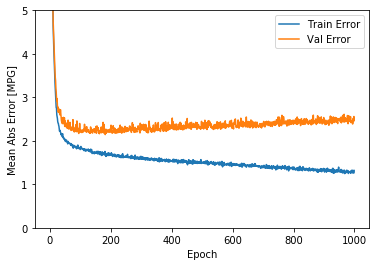

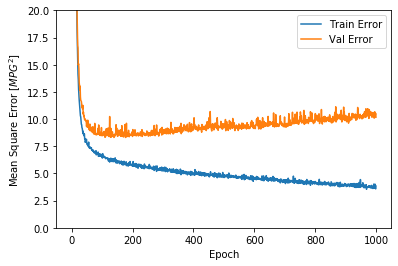

In [39]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


....................................................................................................
....

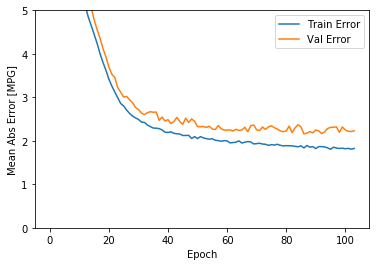

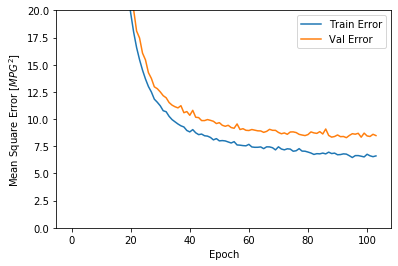

In [40]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [45]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  2.10 MPG


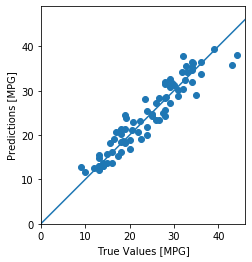

In [46]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

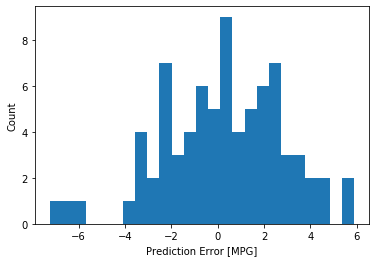

In [47]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")